<!--                          Fancy Indexing                       -->

In [51]:
"""                       Fancy Indexing                              """               

'                       Fancy Indexing                              '

In [52]:
# -----> Exploring Fancy Indexing


In [53]:
import numpy as np

In [54]:
rand = np.random.RandomState(42)
x = rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [55]:
[x[3], x[7], x[2]]

[np.int32(71), np.int32(86), np.int32(14)]

In [56]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60], dtype=int32)

In [57]:
# array([71, 86, 60])

In [58]:
ind = np.array([
                [3, 7],
                [4, 5]
])
x[ind]

array([[71, 86],
       [60, 20]], dtype=int32)

In [59]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [60]:
row = np.array([0 ,1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [61]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [62]:
print(X)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [63]:
X[2, [2, 0 ,1]]

array([10,  8,  9])

In [64]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [65]:
mask = np.array([1, 0, 1, 0], dtype= bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [66]:
# ----->             Example: Selecting Random Points            <------ #

In [67]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

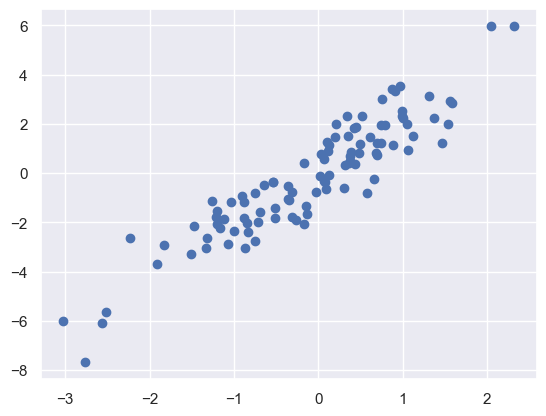

In [68]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1]);

In [69]:
indices = np.random.choice(X.shape[0], 20, replace= False)
indices

array([33,  6, 90, 85, 13,  7, 20, 88,  9, 74, 46, 21, 89, 49, 66, 39, 17,
       15, 83, 24], dtype=int32)

In [70]:
selection = X[indices]
selection.shape

(20, 2)

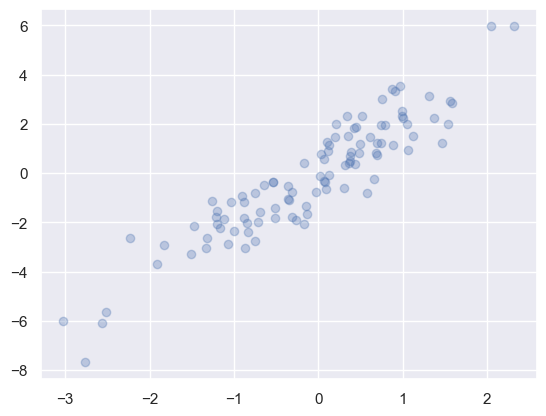

In [71]:
plt.scatter(X[:, 0], X[:, 1], alpha= 0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor = "none", s = 200);

In [72]:
# ----->       Modifying Values with Fancy Indexing               <----- #

In [73]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [74]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [75]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [76]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [77]:
x[i] = x[i] + 1

In [78]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [81]:
np.random.seed(42)
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)
np.add.at(counts, i, 1)

NumPy routine


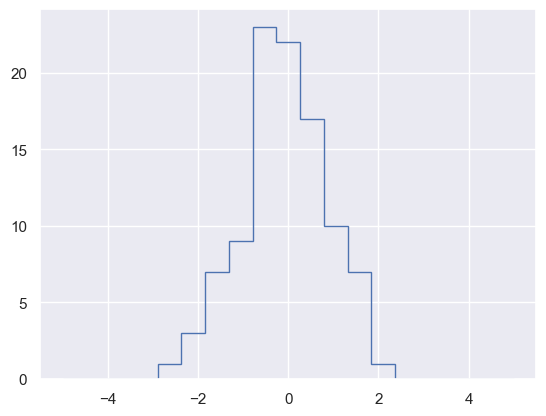

In [ ]:
plt.hist(x, bins, histtype= "step")
print("NumPy routine")

In [85]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

NumPy routine:
10.8 μs ± 93.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [86]:
print("Custom routine")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom routine
8.06 μs ± 173 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [87]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

NumPy routine:
7.61 ms ± 103 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom routine:
64 ms ± 759 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
